<a href="https://colab.research.google.com/github/AhmedAbdallah142/Image-Segmentation/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
import tarfile
import opendatasets as od
from os import listdir
import scipy.io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from scipy.spatial.distance import cdist 
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

In [2]:
od.download("http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz")
tarfile.open("./BSR_bsds500.tgz").extractall("./")

70770688it [00:02, 27006273.13it/s]                              


In [17]:
images = []
ground_truth = []
boundaries = []
path_images = './BSR/BSDS500/data/images/test/'
path_ground = './BSR/BSDS500/data/groundTruth/test/'

images_List = listdir(path_images)
c = 0
for image in images_List:
  if image != "Thumbs.db":
      mat = scipy.io.loadmat(path_ground+image[:-4])
      img = Image.open(path_images + image)
      lst = []
      lst2 = []
      images.append(np.array(img))
      for j in range(mat['groundTruth'].shape[1]):
          lst.append(mat['groundTruth'][0][j][0][0][0])
      ground_truth.append(lst)
      for j in range(mat['groundTruth'].shape[1]):
          lst2.append(mat['groundTruth'][0][j][0][0][1])
      boundaries.append(lst2)

2. Visualize the image and the ground truth segmentation




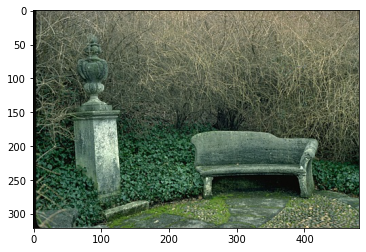

<Figure size 432x288 with 0 Axes>

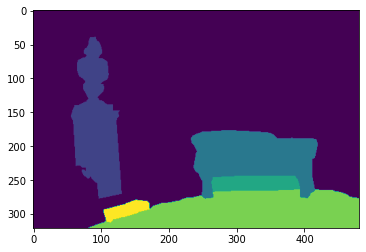

<Figure size 432x288 with 0 Axes>

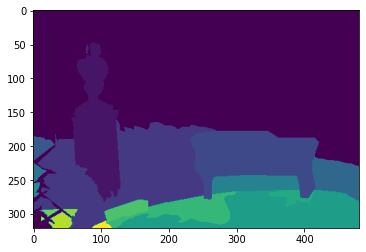

<Figure size 432x288 with 0 Axes>

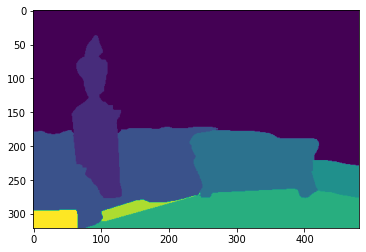

<Figure size 432x288 with 0 Axes>

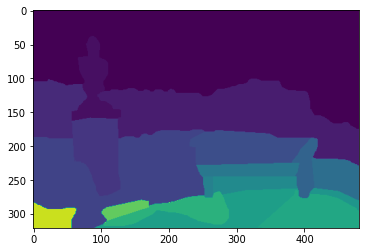

<Figure size 432x288 with 0 Axes>

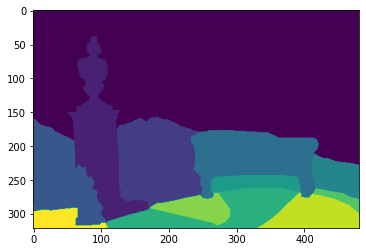

<Figure size 432x288 with 0 Axes>

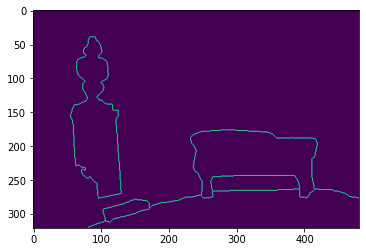

<Figure size 432x288 with 0 Axes>

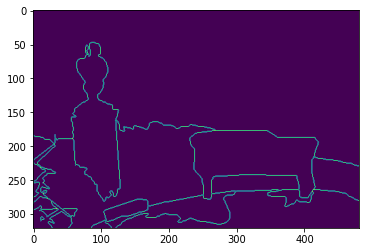

<Figure size 432x288 with 0 Axes>

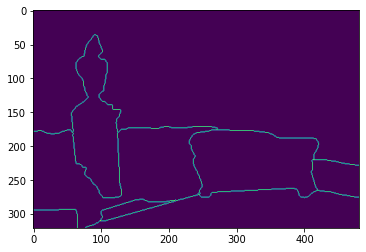

<Figure size 432x288 with 0 Axes>

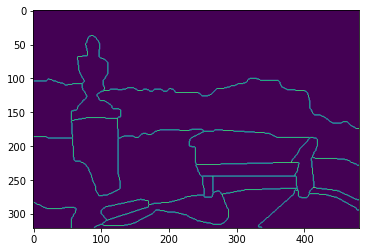

<Figure size 432x288 with 0 Axes>

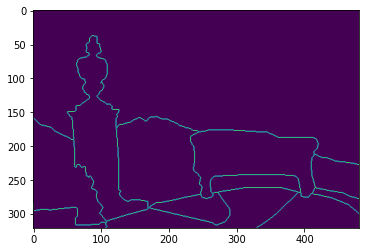

<Figure size 432x288 with 0 Axes>

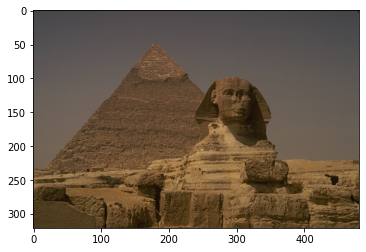

<Figure size 432x288 with 0 Axes>

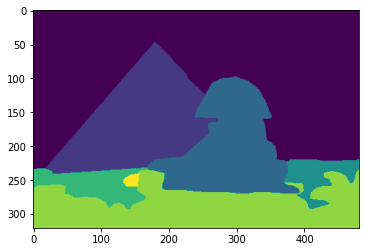

<Figure size 432x288 with 0 Axes>

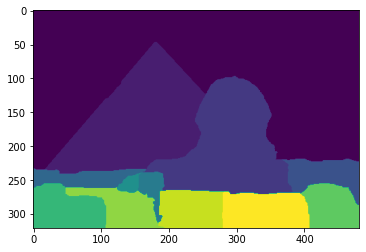

<Figure size 432x288 with 0 Axes>

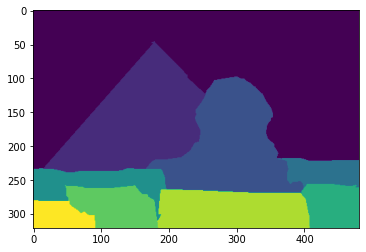

<Figure size 432x288 with 0 Axes>

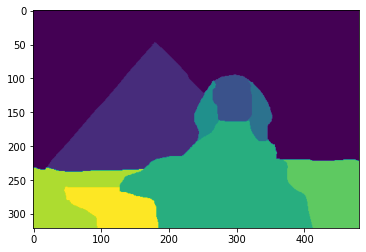

<Figure size 432x288 with 0 Axes>

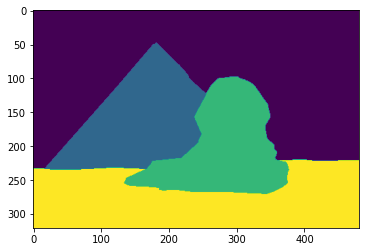

<Figure size 432x288 with 0 Axes>

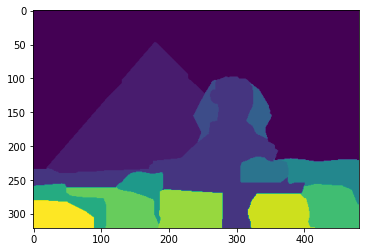

<Figure size 432x288 with 0 Axes>

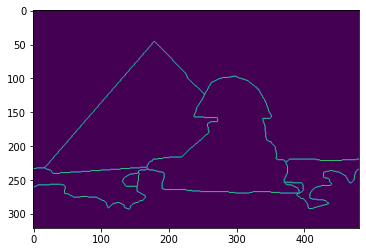

<Figure size 432x288 with 0 Axes>

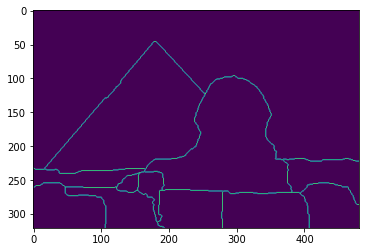

<Figure size 432x288 with 0 Axes>

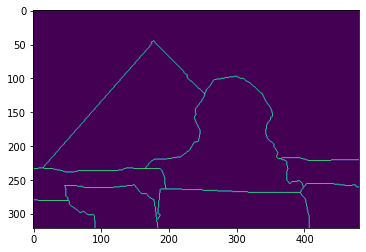

<Figure size 432x288 with 0 Axes>

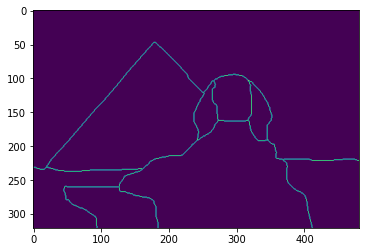

<Figure size 432x288 with 0 Axes>

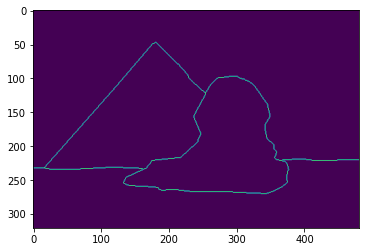

<Figure size 432x288 with 0 Axes>

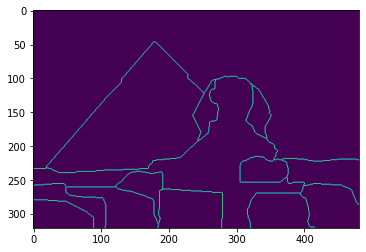

<Figure size 432x288 with 0 Axes>

In [18]:
print("2. Visualize the image and the ground truth segmentation\n\n")

#print 2 samples
for i in range (2):
  plt.imshow(images[i]);
  plt.figure();
  plt.show()
  for j in range(len(ground_truth[i])):
    plt.imshow(ground_truth[i][j]);
    plt.figure();
    plt.show()
  print()
  for j in range(len(boundaries[i])):
    plt.imshow(boundaries[i][j]);
    plt.figure();
    plt.show()
  print()

In [19]:
pixels = 321 * 481
num_imgs = 200

train_set = np.arange(pixels * 3 * num_imgs).reshape(pixels * num_imgs, 3) 

for i in range(num_imgs):
    train_set[pixels*i : pixels+(pixels*i) ,:] = images[i].reshape(pixels,3)

In [6]:
 #Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

In [20]:
colors = [np.array([148,0,211]) ,np.array([0,0,255]) ,np.array([255,0,0])   ,np.array([255,255,0]) ,np.array([102,102,0])  ,
          np.array([75 ,0,130]) ,np.array([0,255,0]) ,np.array([107,27,32]) ,np.array([255,127,0]) ,np.array([51,255,255]) ,np.array([127,127,127])]

def ClusteriseImages(clusters,data_mat):
    clusterised_mat= np.zeros(data_mat.shape,dtype=np.uint8)
    for i in range(data_mat.shape[0]):
        clusterised_mat[i] = colors[clusters[i]]
    return clusterised_mat

In [21]:
clusterised_imgs = []
clusterings = []
test = 50
for i in range (test):
  row = []
  for k in range(3,12,2):
    image = train_set[pixels*i : pixels+(pixels*i)] 
    model = kmeans(image,k,20)
    row.append(model)
    clusterised_imgs.append(ClusteriseImages(model,image))
  clusterings.append(row)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


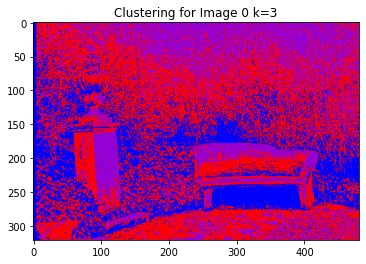

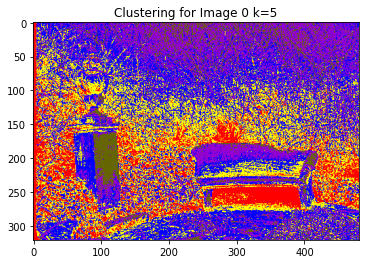

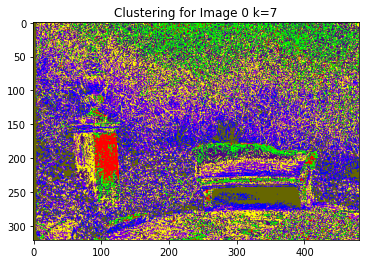

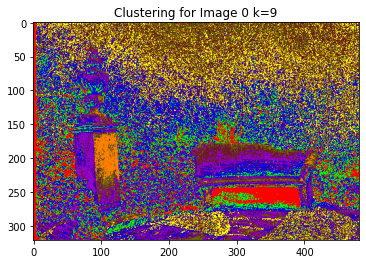

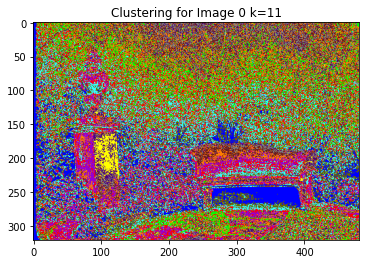

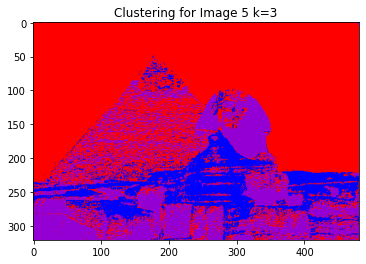

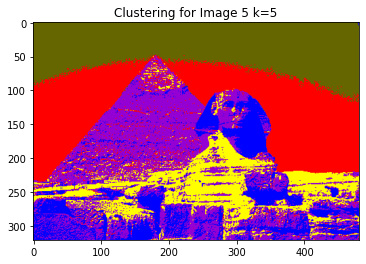

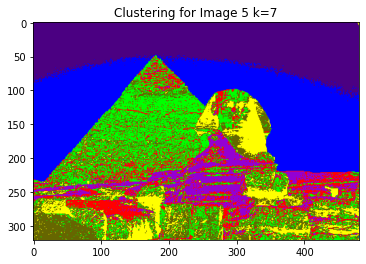

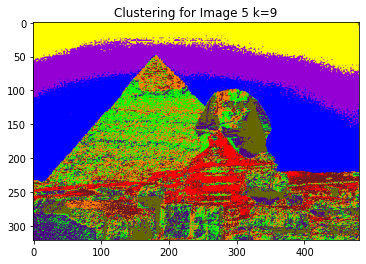

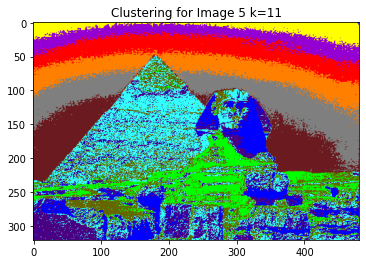

<Figure size 432x288 with 0 Axes>

In [9]:
for i in range (0,6,5):
  count = 0
  for k in range (3,12,2):
    plt.imshow(clusterised_imgs[i+count].reshape(321,481,3));
    plt.title(f'Clustering for Image {i} k={k}');
    plt.figure();
    count = count + 1

In [22]:
def Fmeasure(clusters,partitions):
    F= 0
    contigencyTable = contingency_matrix(clusters,partitions)
    idx=contigencyTable.argmax(axis=1)
    for i in range(contigencyTable.shape[0]):
        nij = contigencyTable.max(axis=1)[i]
        ni = np.sum(contigencyTable[i])
        ji = contigencyTable[:,idx[i]]
        mji = np.sum(ji)
        F += 2 * nij/(ni+mji)
    return F/contigencyTable.shape[0]

In [23]:
def ConditionalEntropy(clusters,partitions):
  result = 0
  contigencyTable = contingency_matrix(clusters,partitions)
  rowsum = contigencyTable.sum(axis = 1)
  totalsum = rowsum.sum()
  for i in range(len(contigencyTable)):
    row = 0
    for j in range(len(contigencyTable[i])):
      if not (contigencyTable[i][j] == 0):
        row -= (contigencyTable[i][j] / rowsum[i])*np.log2(contigencyTable[i][j] / rowsum[i])
    result += ((rowsum[i]/totalsum)*row)
  return result

In [24]:
# Collect Results 
f_result = []
c_result = []
for i in range(test):
  f_image = []
  c_image = []
  for k in range(5):
    f_K = []
    c_K = []
    for j in range(len(ground_truth[i])):
      f_K.append(Fmeasure(clusterings[i][k],ground_truth[i][j].reshape(481*321)))
      c_K.append(ConditionalEntropy(clusterings[i][k],ground_truth[i][j].reshape(481*321)))
    f_image.append(f_K)
    c_image.append(c_K)
  f_result.append(f_image)
  c_result.append(c_image)


for image 0
-------------

for K 3
 F_measure = [0.4504951651203121, 0.4096417775631505, 0.40561545107270874, 0.43563865540041996, 0.40357441135404365] , Average = 0.420993092102127
 Entropy = [1.3398858295816003, 2.114263541421202, 1.9740408893870713, 2.8561426288832084, 2.3110835450357055] , Average = 2.1190832868617573
for K 5
 F_measure = [0.302882149923798, 0.28110910844452297, 0.3206247223384211, 0.34450322842325953, 0.2777559767020952] , Average = 0.30537503716641934
 Entropy = [1.313265593150326, 2.076046712432799, 1.9462593776369133, 2.7985180883284944, 2.2736594595493047] , Average = 2.0815498462195676
for K 7
 F_measure = [0.2660210941721082, 0.25405882458271745, 0.28193892431330786, 0.3173167474798669, 0.24895561619598222] , Average = 0.2736582413487965
 Entropy = [1.2956044954713706, 2.044444657796144, 1.9163694921870456, 2.7589518454764264, 2.241984270452883] , Average = 2.051470952276774
for K 9
 F_measure = [0.23516547660463397, 0.2544878911332417, 0.24254604115096123,

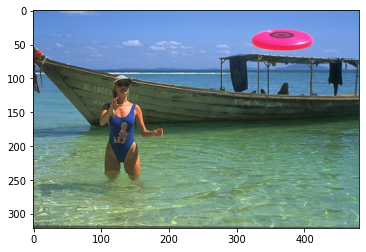

<Figure size 432x288 with 0 Axes>

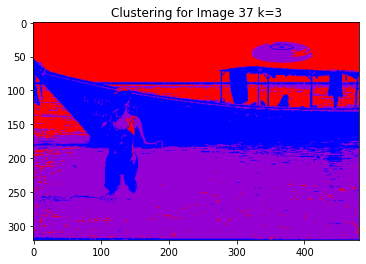

<Figure size 432x288 with 0 Axes>

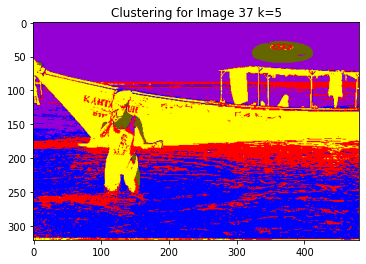

<Figure size 432x288 with 0 Axes>

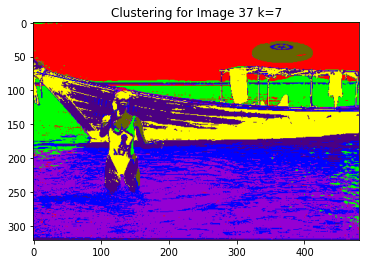

<Figure size 432x288 with 0 Axes>

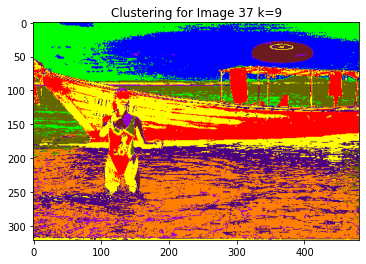

<Figure size 432x288 with 0 Axes>

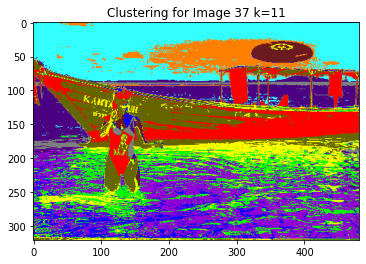

<Figure size 432x288 with 0 Axes>


Worst Result with average f-measure 0.28384287313008455 :



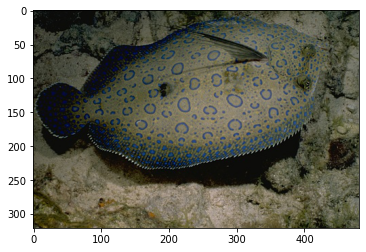

<Figure size 432x288 with 0 Axes>

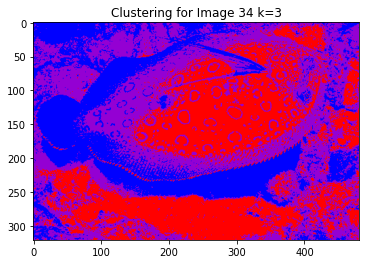

<Figure size 432x288 with 0 Axes>

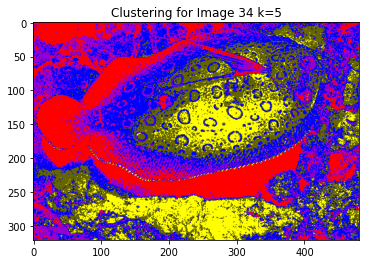

<Figure size 432x288 with 0 Axes>

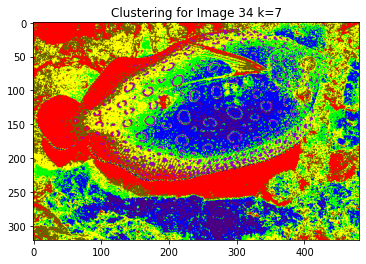

<Figure size 432x288 with 0 Axes>

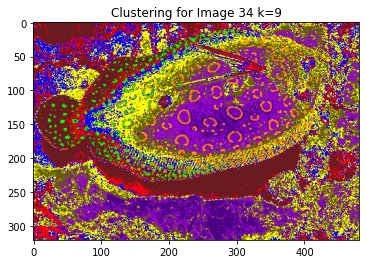

<Figure size 432x288 with 0 Axes>

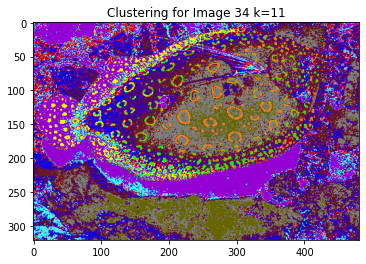

<Figure size 432x288 with 0 Axes>

In [25]:
# Show Results
max = -np.inf
min = np.inf
maxidx = -1
minind = -1
for i in range(len(f_result)):
    print(f'\nfor image {i}\n-------------\n')
    temp = []
    for j,k in enumerate(range(3,12,2)):
        f = np.average(f_result[i][j])
        print(f'for K {k}\n F_measure = {f_result[i][j]} , Average = {f}\n Entropy = {c_result[i][j]} , Average = {np.average(c_result[i][j])}')
        temp.append(f)
    if np.average(temp) > max:
        max = np.average(temp)
        maxidx = i
    if np.average(temp) < min:
        min = np.average(temp)
        minidx = i

print(f'\nBest Result with average f-measure {max} :\n')
plt.imshow(images[maxidx]);
plt.figure();
plt.show()
for c,k in enumerate(range (3,12,2)):
    plt.imshow(clusterised_imgs[(maxidx*5)+c].reshape(321,481,3));
    plt.title(f'Clustering for Image {maxidx} k={k}');
    plt.figure();
    plt.show()
print(f'\nWorst Result with average f-measure {min} :\n')
plt.imshow(images[minidx]);
plt.figure();
plt.show()
for c,k in enumerate(range (3,12,2)):
    plt.imshow(clusterised_imgs[(minidx*5)+c].reshape(321,481,3));
    plt.title(f'Clustering for Image {minidx} k={k}');
    plt.figure();
    plt.show()

In [26]:
temp = []
temp_groundtruth = []
choices = [1,2,4,5,6]
for i in choices:
  temp.append(images[i])
  temp_groundtruth.append(ground_truth[i])

In [27]:
def get_image_RGB(image):
  img = np.arange(321*481*3).reshape(321*481, 3)
  count=0
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      img[count] = image[i,j,:]
      count = count +1
  return img

In [28]:
def graph_5NN (data):
  A = kneighbors_graph(data, 5, mode='connectivity', include_self=True)
  return A.toarray()

def Normalize(U):
  row_sums = U.sum(axis=1)
  return U / row_sums[:, np.newaxis];

def NormalizedCut(A,K):
  delta = np.zeros((A.shape[0],A.shape[0]))
  for i in range(A.shape[0]):
    delta[i,i] = np.sum(A[i])
  B = np.identity(A.shape[0]) - np.dot(np.linalg.inv(delta),A)
  U = np.linalg.eigh(B)[1][:,:K]
  Y = Normalize(U);
  return kmeans(Y,K,20)

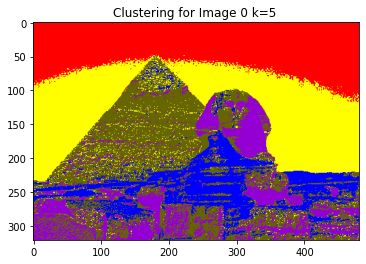

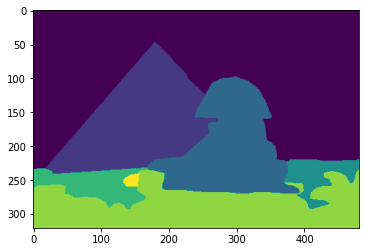

<Figure size 432x288 with 0 Axes>

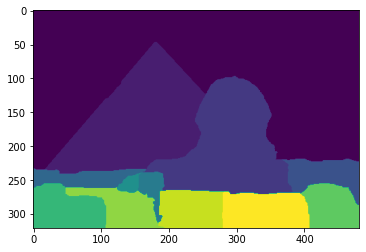

<Figure size 432x288 with 0 Axes>

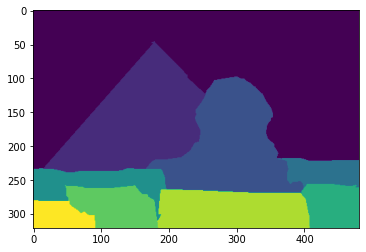

<Figure size 432x288 with 0 Axes>

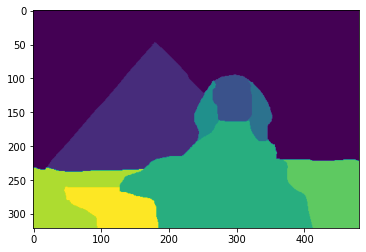

<Figure size 432x288 with 0 Axes>

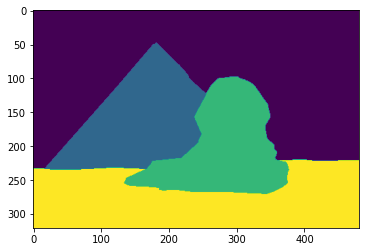

<Figure size 432x288 with 0 Axes>

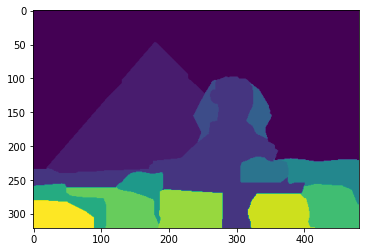

<Figure size 432x288 with 0 Axes>

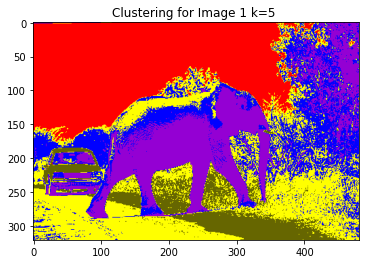

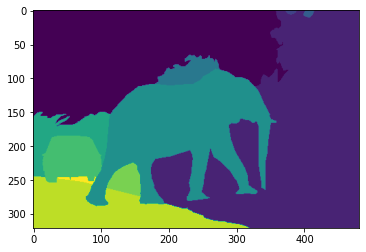

<Figure size 432x288 with 0 Axes>

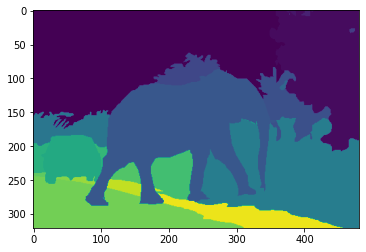

<Figure size 432x288 with 0 Axes>

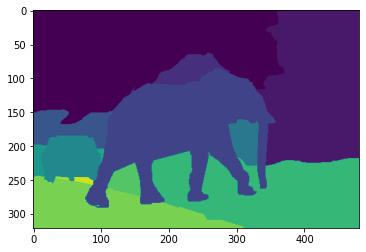

<Figure size 432x288 with 0 Axes>

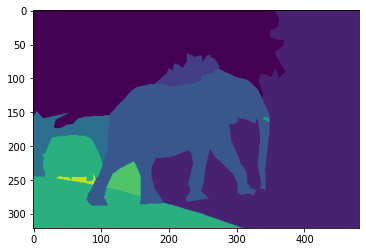

<Figure size 432x288 with 0 Axes>

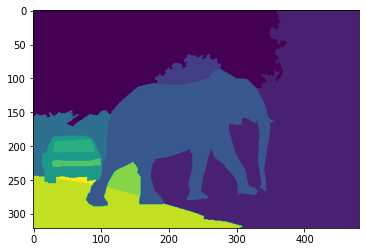

<Figure size 432x288 with 0 Axes>

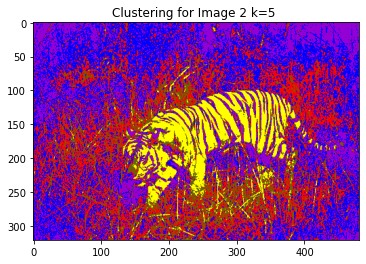

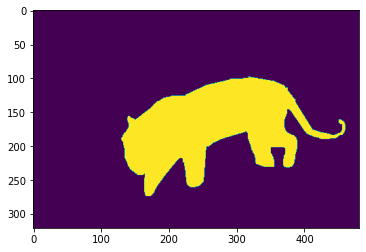

<Figure size 432x288 with 0 Axes>

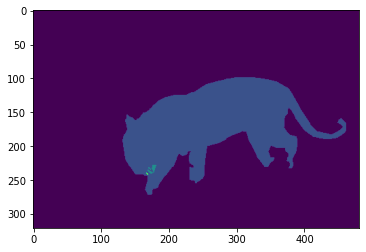

<Figure size 432x288 with 0 Axes>

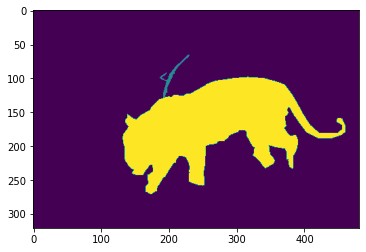

<Figure size 432x288 with 0 Axes>

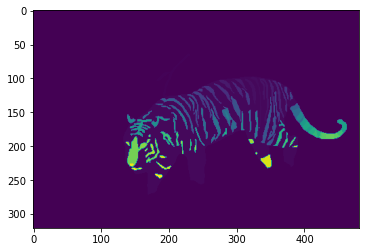

<Figure size 432x288 with 0 Axes>

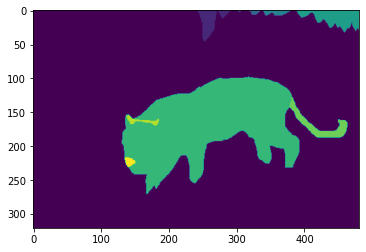

<Figure size 432x288 with 0 Axes>

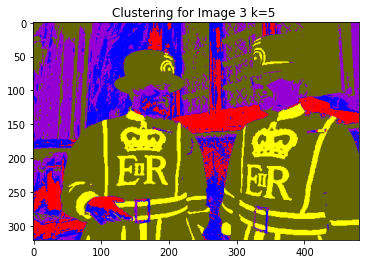

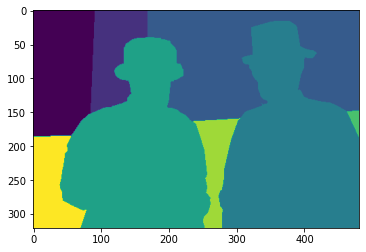

<Figure size 432x288 with 0 Axes>

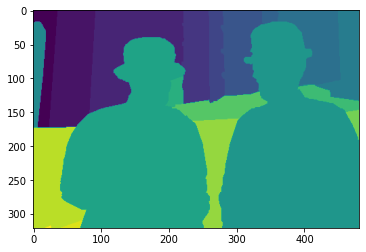

<Figure size 432x288 with 0 Axes>

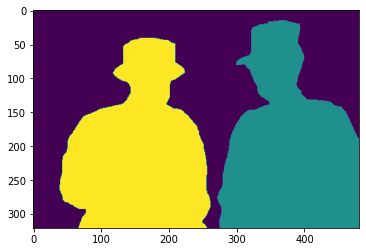

<Figure size 432x288 with 0 Axes>

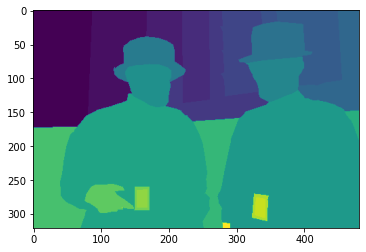

<Figure size 432x288 with 0 Axes>

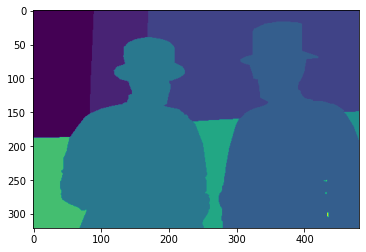

<Figure size 432x288 with 0 Axes>

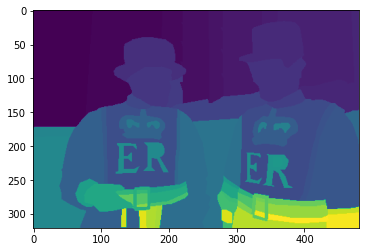

<Figure size 432x288 with 0 Axes>

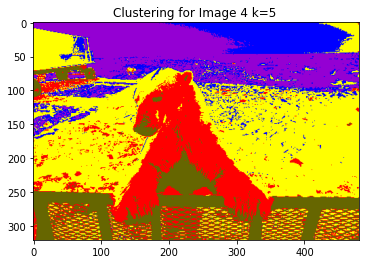

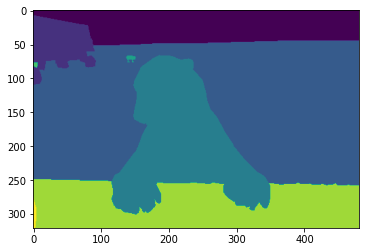

<Figure size 432x288 with 0 Axes>

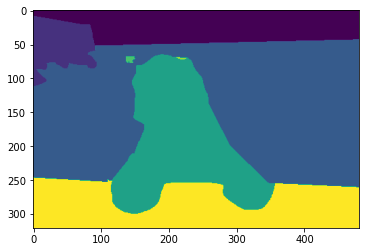

<Figure size 432x288 with 0 Axes>

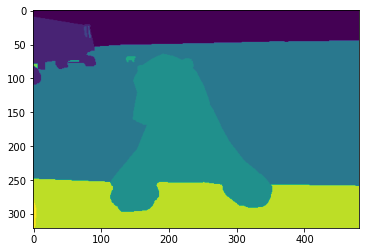

<Figure size 432x288 with 0 Axes>

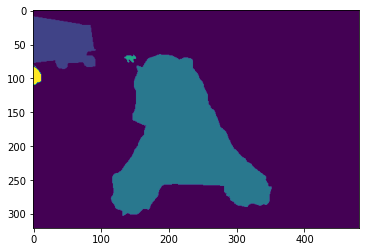

<Figure size 432x288 with 0 Axes>

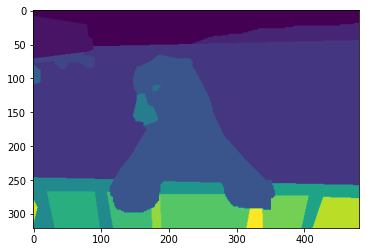

<Figure size 432x288 with 0 Axes>

In [29]:
for i in range (5):
  image = get_image_RGB(temp[i]) 
  model = kmeans(image,5,20)
  kmeans_image=ClusteriseImages(model,image)
  plt.imshow(kmeans_image.reshape(321,481,3));
  plt.title(f'Clustering for Image {i} k=5 ');
  plt.figure();
  print()
  for j in range(len(temp_groundtruth[i])):
    plt.imshow(temp_groundtruth[i][j]);
    plt.figure();
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


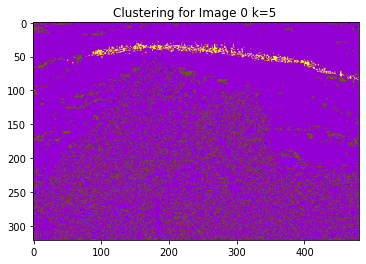

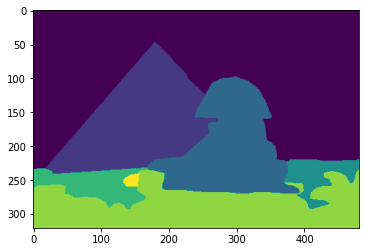

<Figure size 432x288 with 0 Axes>

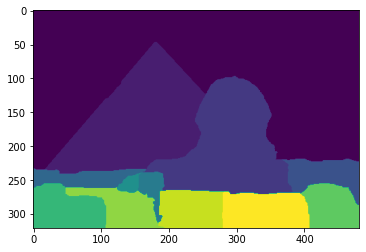

<Figure size 432x288 with 0 Axes>

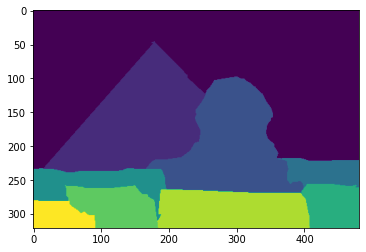

<Figure size 432x288 with 0 Axes>

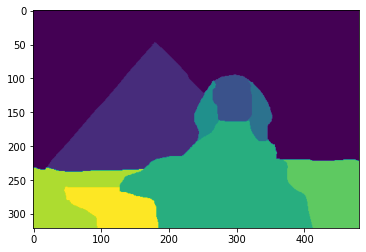

<Figure size 432x288 with 0 Axes>

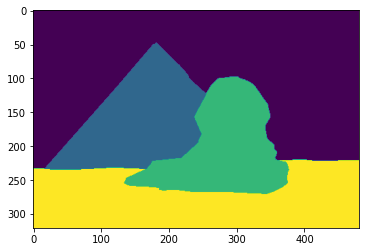

<Figure size 432x288 with 0 Axes>

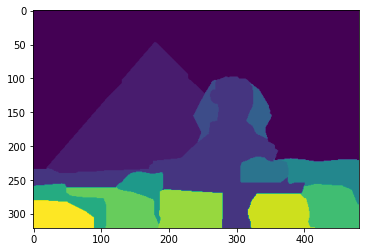

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


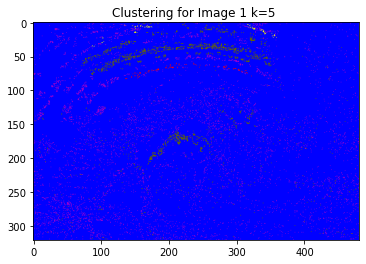

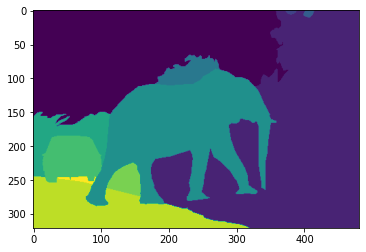

<Figure size 432x288 with 0 Axes>

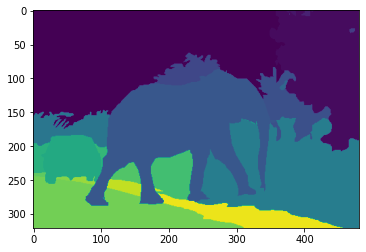

<Figure size 432x288 with 0 Axes>

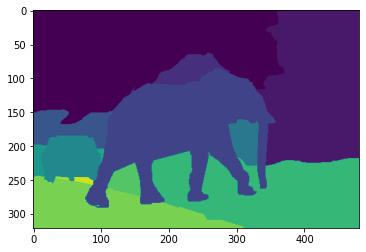

<Figure size 432x288 with 0 Axes>

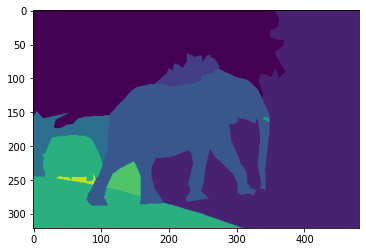

<Figure size 432x288 with 0 Axes>

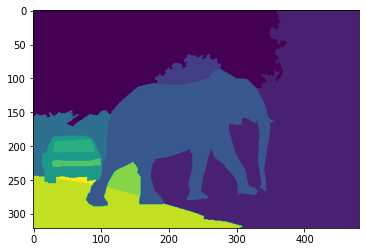

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


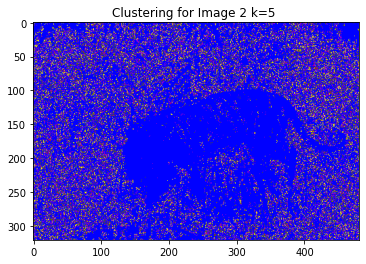

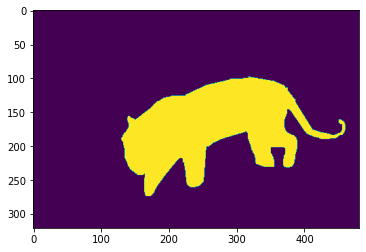

<Figure size 432x288 with 0 Axes>

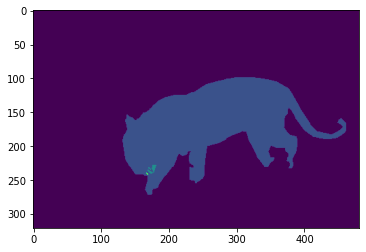

<Figure size 432x288 with 0 Axes>

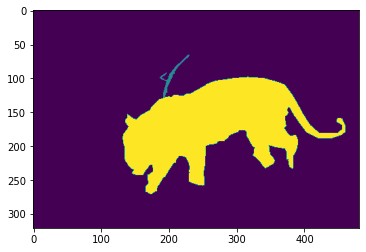

<Figure size 432x288 with 0 Axes>

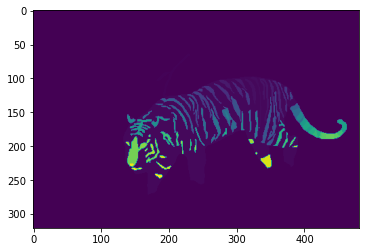

<Figure size 432x288 with 0 Axes>

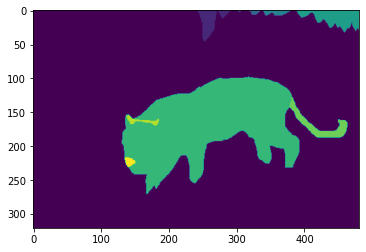

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


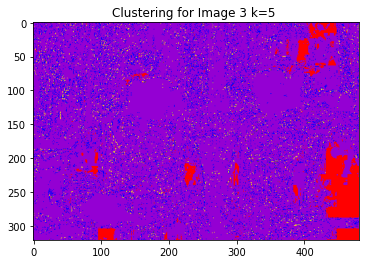

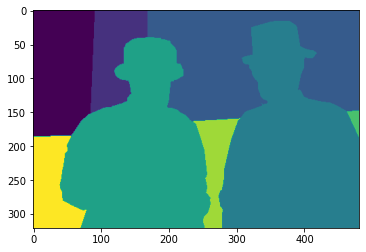

<Figure size 432x288 with 0 Axes>

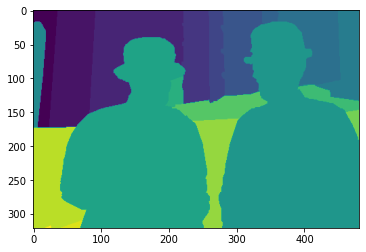

<Figure size 432x288 with 0 Axes>

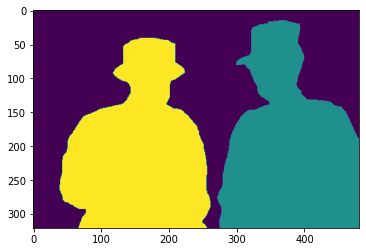

<Figure size 432x288 with 0 Axes>

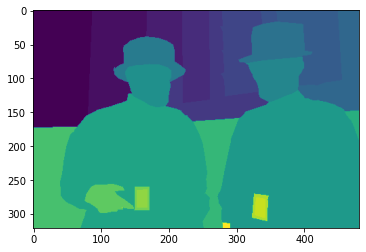

<Figure size 432x288 with 0 Axes>

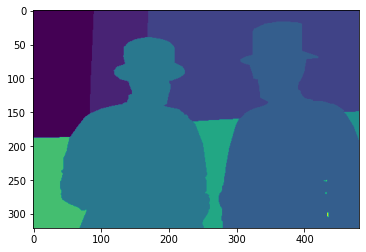

<Figure size 432x288 with 0 Axes>

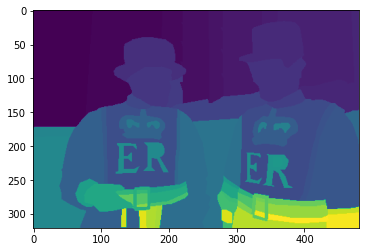

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


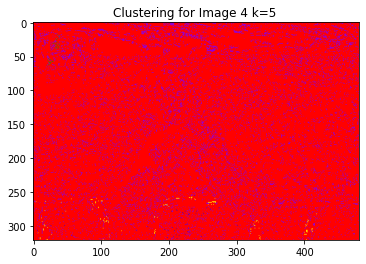

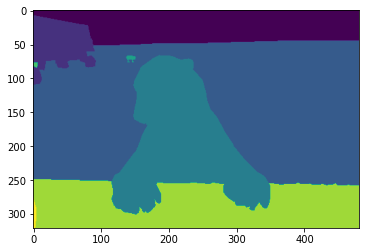

<Figure size 432x288 with 0 Axes>

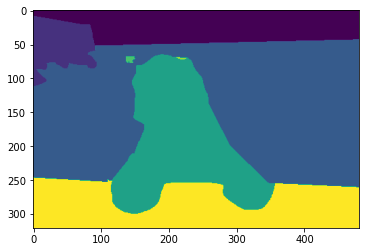

<Figure size 432x288 with 0 Axes>

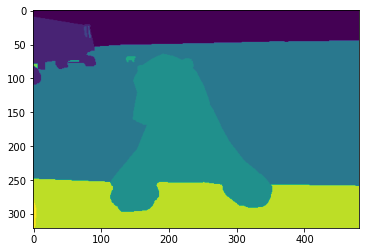

<Figure size 432x288 with 0 Axes>

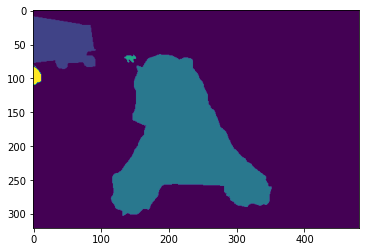

<Figure size 432x288 with 0 Axes>

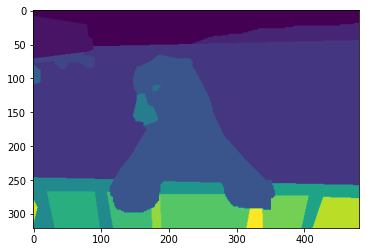

<Figure size 432x288 with 0 Axes>

In [30]:
for i in range (5):
  image = get_image_RGB(temp[i]) 
  model = SpectralClustering(n_clusters=5,affinity='nearest_neighbors',n_neighbors=5,n_jobs=-1).fit_predict(image)
  kmeans_image=ClusteriseImages(model,image)
  plt.imshow(kmeans_image.reshape(321,481,3));
  plt.title(f'Clustering for Image {i} k=5 ');
  plt.figure();
  print()
  for j in range(len(temp_groundtruth[i])):
    plt.imshow(temp_groundtruth[i][j]);
    plt.figure();
    plt.show()

In [32]:
def get_image_RGB_Spatial(image):
  img = np.arange(321*481*5).reshape(321*481, 5)
  count=0
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      img[count] = np.append(image[i,j,:],[i,j])
      count = count +1
  return img

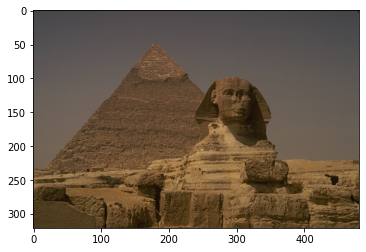

<Figure size 432x288 with 0 Axes>

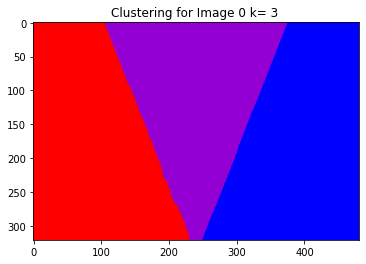

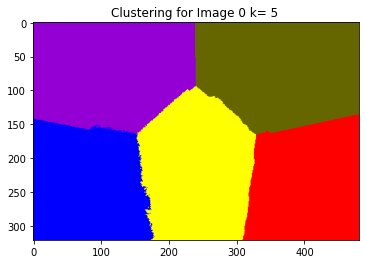

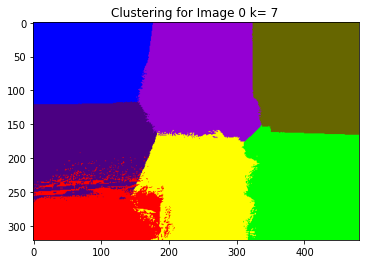

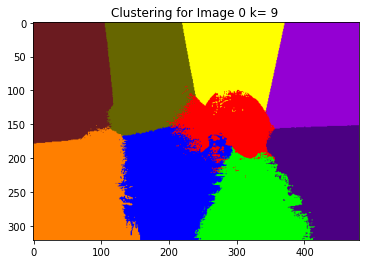

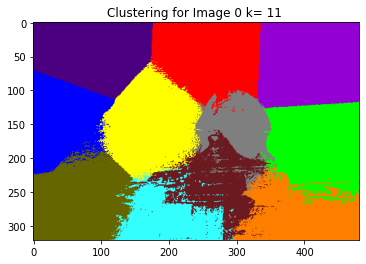

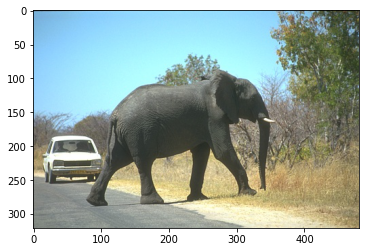

<Figure size 432x288 with 0 Axes>

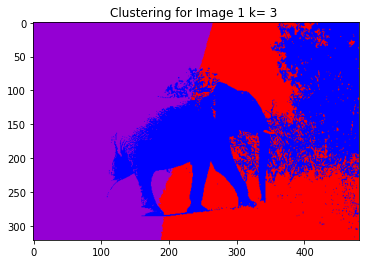

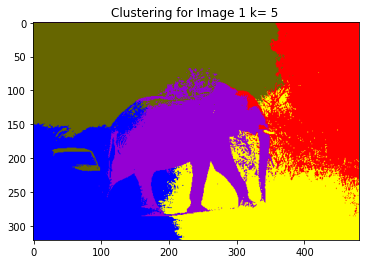

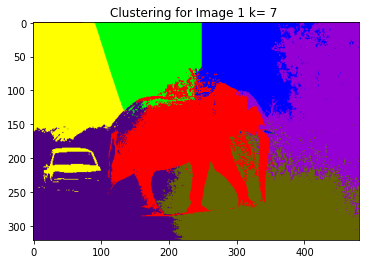

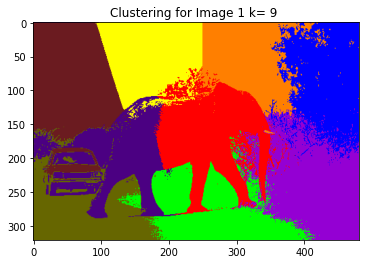

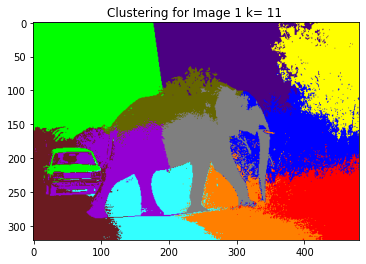

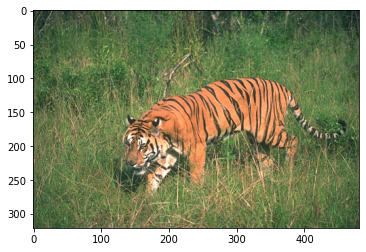

<Figure size 432x288 with 0 Axes>

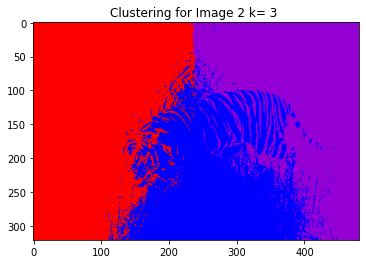

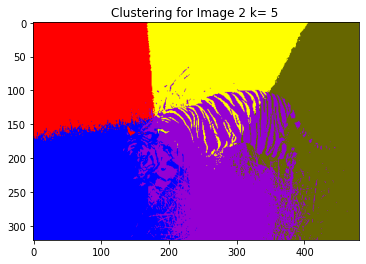

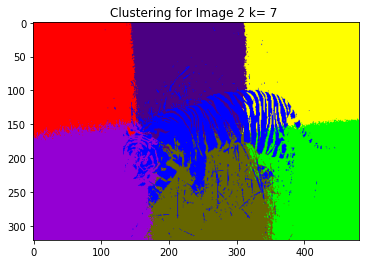

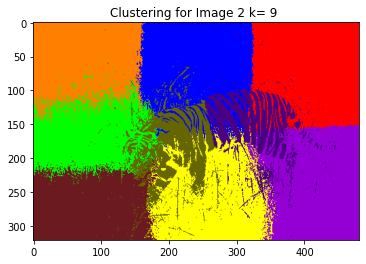

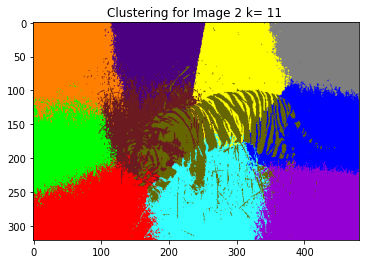

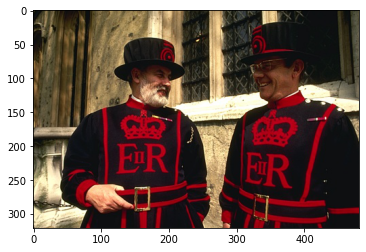

<Figure size 432x288 with 0 Axes>

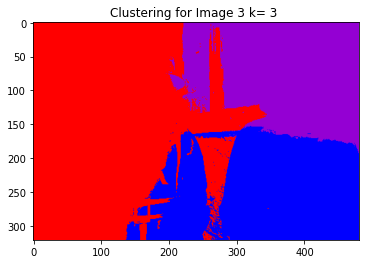

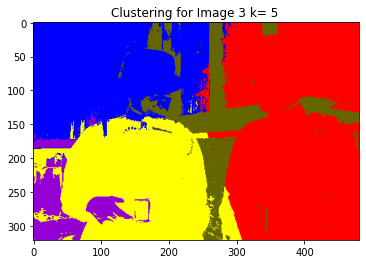

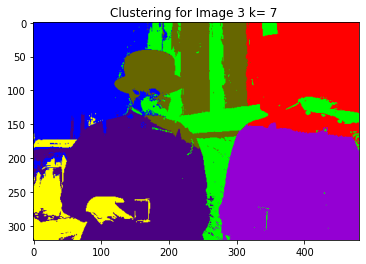

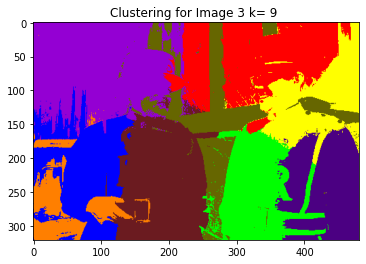

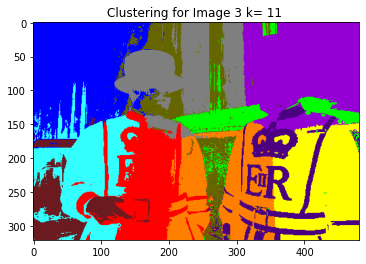

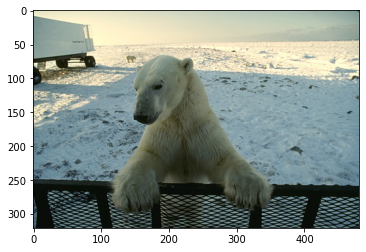

<Figure size 432x288 with 0 Axes>

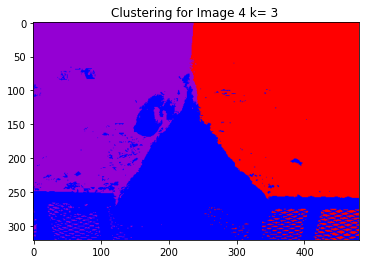

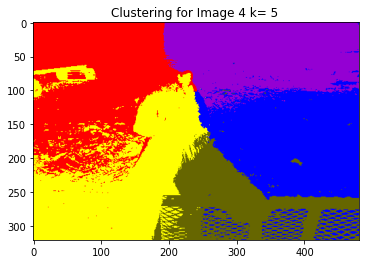

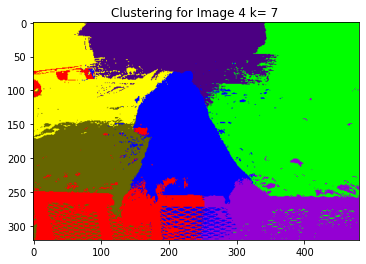

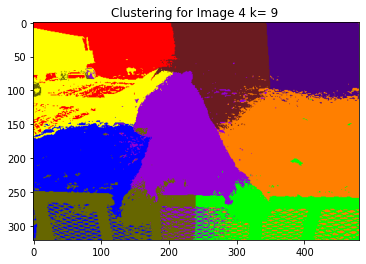

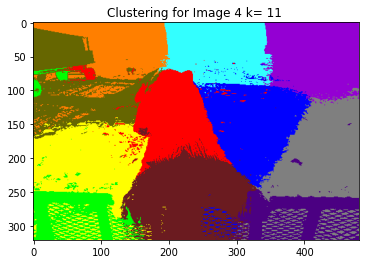

<Figure size 432x288 with 0 Axes>

In [33]:
for i in range (5):
    plt.imshow(images[choices[i]]);
    plt.figure();
    plt.show()
    for k in range(3,12,2):
        image = get_image_RGB_Spatial(temp[i]) 
        im = get_image_RGB(temp[i]) 
        model = kmeans(image,k,20)
        kmeans_image=ClusteriseImages(model,im)
        plt.imshow(kmeans_image.reshape(321,481,3));
        plt.title(f'Clustering for Image {i} k= {k} ');
        plt.figure();